Score Category 0:
R1    103.154476
G1    103.879387
B1     93.519222
R2    170.014397
G2    176.989282
B2    178.465841
R3    119.678512
G3    122.457547
B3    115.710627
Name: 0, dtype: float64


Score Category 1:
R1    103.261010
G1    104.846022
B1     88.315797
R2    172.582542
G2    179.965608
B2    179.909348
R3    119.533600
G3    123.022349
B3    111.092553
Name: 1, dtype: float64


Score Category 2:
R1    103.957837
G1    106.204577
B1     85.715110
R2    174.396725
G2    182.122497
B2    181.668150
R3    118.431134
G3    122.361162
B3    107.187218
Name: 2, dtype: float64


Score Category 3:
R1    104.886627
G1    107.296468
B1     84.248105
R2    173.587351
G2    181.525186
B2    180.471341
R3    118.781107
G3    122.688445
B3    105.110228
Name: 3, dtype: float64


Score Category 4:
R1    105.010009
G1    107.425386
B1     82.908943
R2    173.305665
G2    181.270296
B2    179.969406
R3    120.319645
G3    124.601324
B3    106.419388
Name: 4, dtype: float64


Score Category 

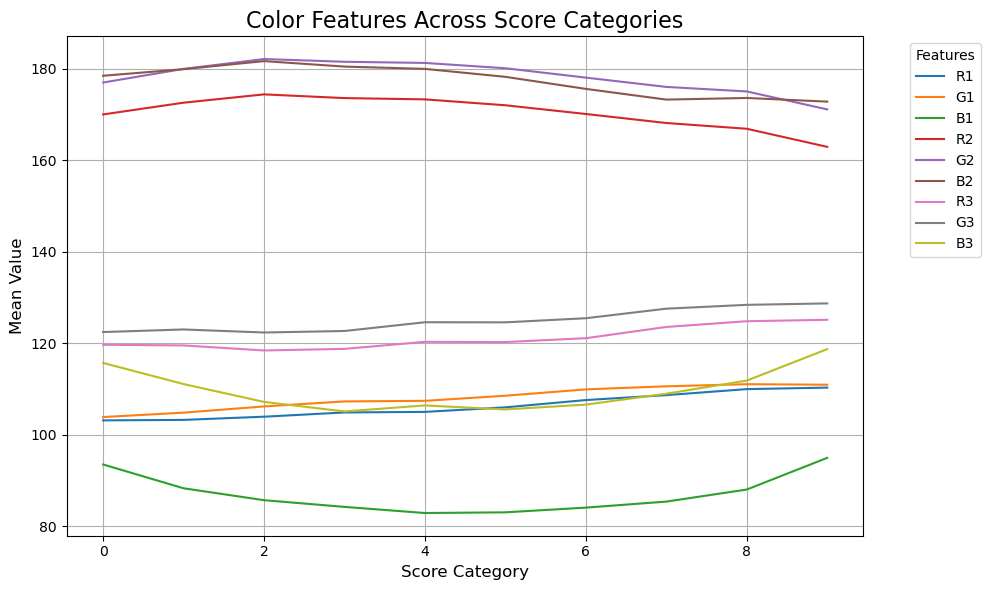

In [4]:
import pandas as pd
from collections import Counter
import os

# Read the score data
df_scores = pd.read_csv('/home/ubuntu/landscape-aesthetics/data/external/scenicornot/scenicornot.metadata.csv')

# Read the color feature data (color space features: H_mean, S_mean, V_mean, etc.)
df_colors = pd.read_csv('/home/ubuntu/landscape-aesthetics/reports/dominant_colors.csv')  # Change to the path of your color feature file

# Assume the first column in df_scores is the image name and the 8th column is the score
df_scores = df_scores[['filename', 'average']]  # Extract the columns for image names and scores

# Divide the scores into 10 equal-frequency intervals
df_scores['score_category'] = pd.qcut(df_scores['average'], q=10, labels=False)

df_colors['filename_extracted'] = df_colors['image_path'].apply(os.path.basename)
df_scores['filename_extracted'] = df_scores['filename'].apply(os.path.basename)

# Merge the two dataframes based on the image name
df_merged = pd.merge(df_scores, df_colors, left_on='filename_extracted', right_on='filename_extracted')

# Calculate the mean of each color space feature per score category
color_features = ['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']

mean_colors_by_category = df_merged.groupby('score_category')[color_features].mean()

# Output the mean values of the color features for each score category
for category in mean_colors_by_category.index:
    print(f"Score Category {category}:")
    print(mean_colors_by_category.loc[category])
    print("\n")

# Visualize the color features for each score category
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in color_features:
    plt.plot(mean_colors_by_category.index, mean_colors_by_category[feature], label=feature)

plt.title('Color Features Across Score Categories', fontsize=16)
plt.xlabel('Score Category', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Correlation between color features and score:
mean_R       0.031941
mean_G       0.042393
mean_B      -0.019651
color_std   -0.138847
average      1.000000
Name: average, dtype: float64


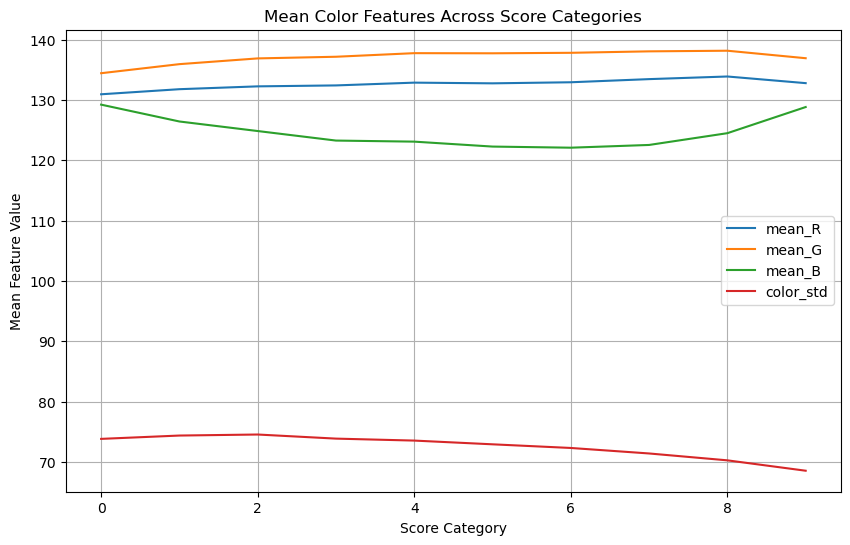

In [7]:
df_merged['mean_R'] = df_merged[['R1', 'R2', 'R3']].mean(axis=1)
df_merged['mean_G'] = df_merged[['G1', 'G2', 'G3']].mean(axis=1)
df_merged['mean_B'] = df_merged[['B1', 'B2', 'B3']].mean(axis=1)
df_merged['color_std'] = df_merged[['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3']].std(axis=1)


color_features_2 = ['mean_R', 'mean_G', 'mean_B', 'color_std', 'average']

correlation_matrix = df_merged[color_features_2].corr()
print("Correlation between color features and score:")
print(correlation_matrix['average'])

mean_colors_by_category_2 = df_merged.groupby('score_category')[['mean_R', 'mean_G', 'mean_B', 'color_std']].mean()

mean_colors_by_category_2.plot(kind='line', figsize=(10, 6))
plt.title('Mean Color Features Across Score Categories')
plt.xlabel('Score Category')
plt.ylabel('Mean Feature Value')
plt.grid(True)
plt.show()


In [10]:
css3_hex_to_names = {
    "#000000": "black",       
    "#0000ff": "blue",       
    "#a52a2a": "brown",      
    "#808080": "gray",        
    "#008000": "green",       
    "#ffa500": "orange",      
    "#ffc0cb": "pink",        
    "#800080": "purple",     
    "#ff0000": "red",         
    "#ffffff": "white",       
    "#ffff00": "yellow"       
}
def get_closest_color_name(r, g, b):
    min_colors = {}
    for hex_code, name in css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(hex_code)
        rd = (r_c - r) ** 2
        gd = (g_c - g) ** 2
        bd = (b_c - b) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_color_name(r, g, b):
    try:
        return webcolors.rgb_to_name((int(r), int(g), int(b)))
    except ValueError:
        return get_closest_color_name(r, g, b)

# Get dominant color names for each score category
dominant_color_names = {}

for category in mean_colors_by_category.index:
    dominant_colors = []
    for i in range(1, 4):  # For R1,G1,B1; R2,G2,B2; R3,G3,B3
        r, g, b = mean_colors_by_category[f'R{i}'][category], mean_colors_by_category[f'G{i}'][category], mean_colors_by_category[f'B{i}'][category]
        color_name = get_color_name(r, g, b)
        dominant_colors.append(color_name)
    dominant_color_names[category] = dominant_colors
    print(f"Score Category {category}: Dominant Colors - {dominant_colors}")


Score Category 0: Dominant Colors - ['gray', 'gray', 'gray']
Score Category 1: Dominant Colors - ['gray', 'gray', 'gray']
Score Category 2: Dominant Colors - ['gray', 'pink', 'gray']
Score Category 3: Dominant Colors - ['gray', 'pink', 'gray']
Score Category 4: Dominant Colors - ['gray', 'pink', 'gray']
Score Category 5: Dominant Colors - ['gray', 'gray', 'gray']
Score Category 6: Dominant Colors - ['gray', 'gray', 'gray']
Score Category 7: Dominant Colors - ['gray', 'gray', 'gray']
Score Category 8: Dominant Colors - ['gray', 'gray', 'gray']
Score Category 9: Dominant Colors - ['gray', 'gray', 'gray']
